In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans

In [29]:

import kagglehub
vjchoudhary7_customer_segmentation_tutorial_in_python_path = kagglehub.dataset_download('vjchoudhary7/customer-segmentation-tutorial-in-python')

print('Data source import complete.')


Data source import complete.


In [30]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [31]:
print(f'The database has {df.shape[0]} rows and {df.shape[1]} columns')

The database has 200 rows and 5 columns


In [32]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


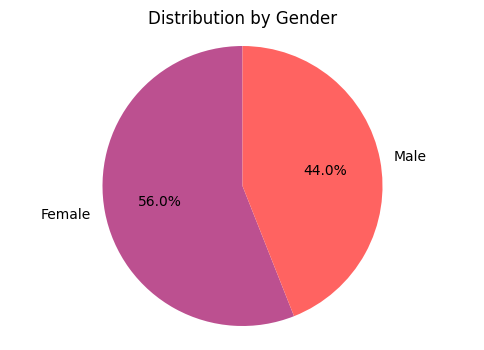

In [35]:
# Distribution by Gender
proportion = df['Gender'].value_counts()

plt.figure(figsize=(6,4))
plt.pie(proportion, labels=proportion.index, autopct='%1.1f%%', startangle=90, colors=['#bc5090', '#ff6361'])
plt.title('Distribution by Gender')
plt.axis('equal')
plt.show()

<ipython-input-36-2141272784>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='Gender', x='Annual Income (k$)', palette='viridis')


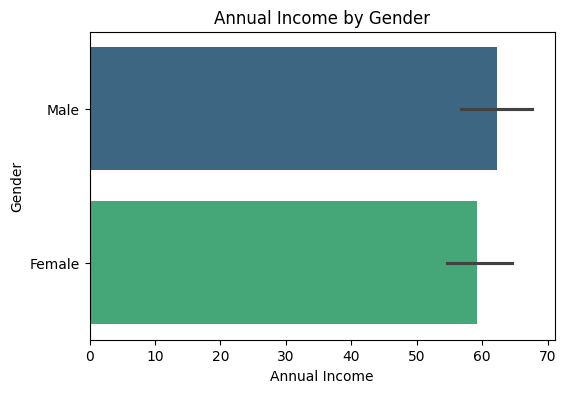

In [36]:
# Annual Income by Gender
plt.figure(figsize=(6,4))
sns.barplot(data=df, y='Gender', x='Annual Income (k$)', palette='viridis')
plt.title('Annual Income by Gender')
plt.xlabel('Annual Income')
plt.ylabel('Gender')
plt.show()



<Axes: >

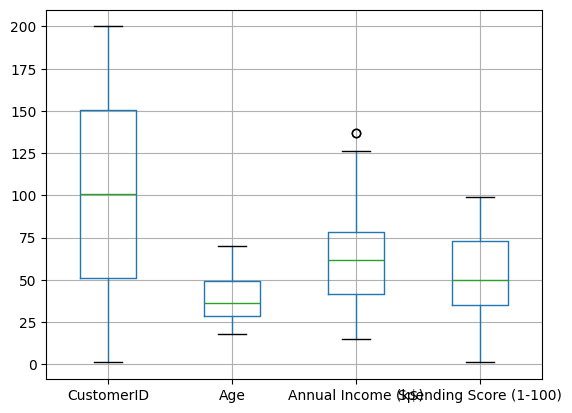

In [37]:
df.boxplot()

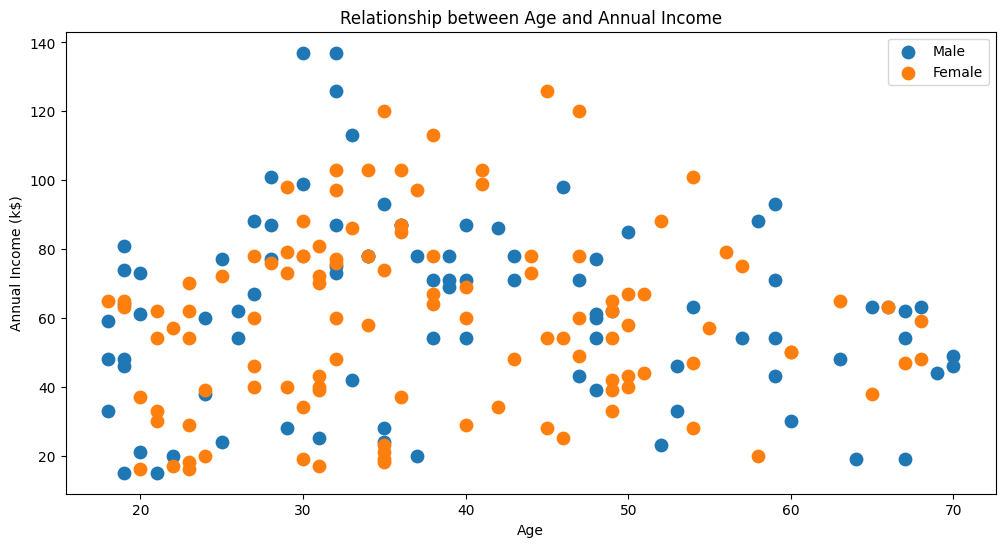

In [38]:
# Graphical visualization of database samples
plt.figure(figsize=(12,6), dpi=100)
for gender in ['Male', 'Female']:
  plt.scatter(x='Age', y='Annual Income (k$)',
              data=df[df['Gender'] == gender],
                s=80, alpha=1, label=gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Relationship between Age and Annual Income')
plt.legend()
plt.show()

In [39]:
df_new = df[['Age', 'Spending Score (1-100)']]
df_new

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [40]:
# Define an array with k values
clusters_numbers = np.arange(1, 10, 1)

In [41]:
# Create a list to store cost function values
inertia_values = []

In [42]:
# Define central centroids
init = 'k-means++'

In [43]:
for k in clusters_numbers:
  kmeans = KMeans(n_clusters=k, init=init, random_state=42)
  kmeans.fit(df_new)
  inertia_values.append(kmeans.inertia_)

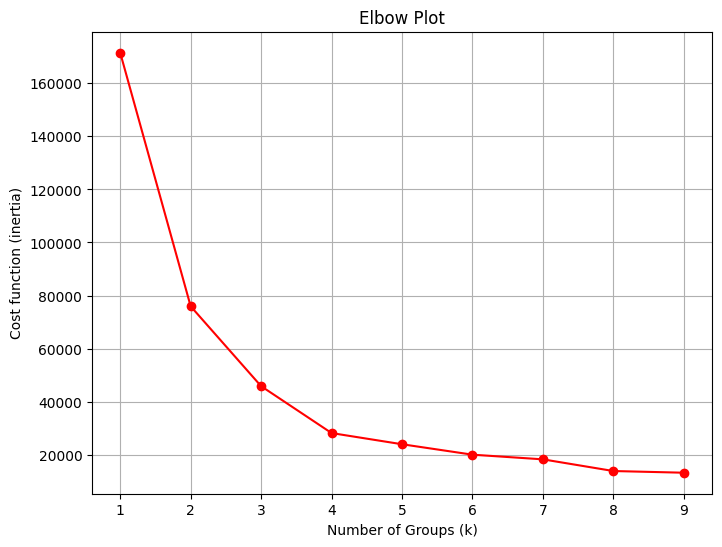

In [44]:
# Generate elbow plot
plt.figure(figsize=(8,6), dpi=100)
plt.plot(clusters_numbers, inertia_values, 'r-o')
plt.title('Elbow Plot')
plt.ylabel('Cost function (inertia)')
plt.xlabel('Number of Groups (k)')
plt.xticks(clusters_numbers)
plt.grid(True)
plt.show()

In [45]:
# Define the number of groups (clusters) and the initial centroids
k = 4
init = "k-means++"

In [46]:
# Instantiate the KMeans object with the values of k
kmeans = KMeans(n_clusters=k, init=init, verbose=1, random_state=42)

In [47]:
# Perform data clustering
kmeans.fit(df_new)

Initialization complete
Iteration 0, inertia 43018.0.
Iteration 1, inertia 31498.097796507973.
Iteration 2, inertia 29183.441549167095.
Iteration 3, inertia 28315.639342279715.
Iteration 4, inertia 28244.226835219684.
Iteration 5, inertia 28195.426897475347.
Iteration 6, inertia 28179.463887153128.
Iteration 7, inertia 28165.583566629342.
Converged at iteration 7: strict convergence.


KMeans(n_clusters=4, random_state=42, verbose=1)

In [48]:
# Identify the final cost function value
inertia = kmeans.inertia_
inertia

28165.583566629342

In [49]:
# Identify the final coordinates of the group centroids
centroids = kmeans.cluster_centers_
centroids


array([[55.70833333, 48.22916667],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [27.61702128, 49.14893617]])

In [50]:
# Visualize sample clustering
kmeans.labels_

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [51]:
# Build a dataframe with the cluster attribute
df_clusters = df_new.copy()
df_clusters['Cluster'] = kmeans.predict(df[['Age', 'Spending Score (1-100)']])

In [52]:
# View the dataframe with the 'Cluster' attribute
df_clusters.head()

,Age,Spending Score (1-100),Cluster
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3


Text(0, 0.5, 'Spending Score (1-100)')

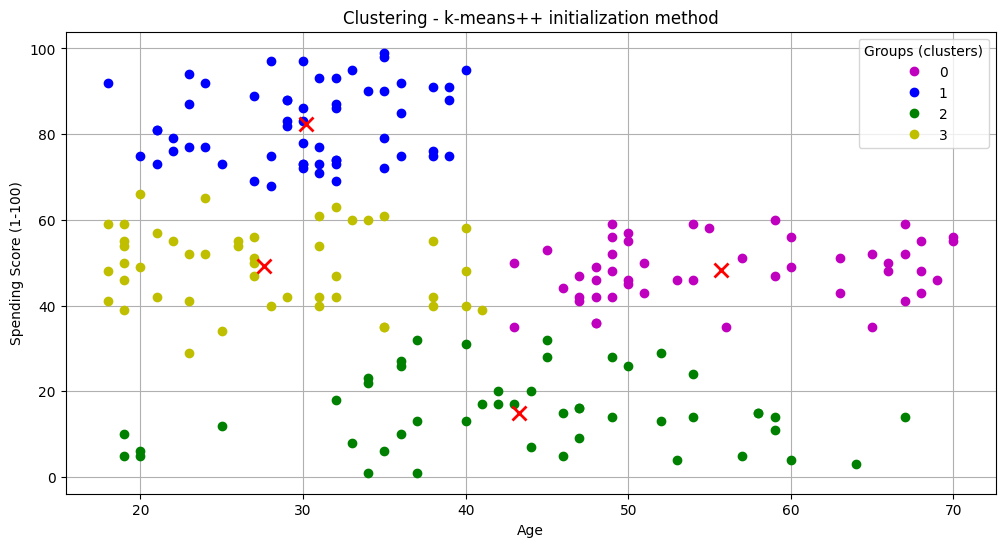

In [53]:
# Generate a figure:
plt.figure(figsize=(12,6), dpi=100)

# Generate the plot with samples from group 0:
symbols = ['mo', 'bo', 'go', 'yo']
for idx, value in enumerate(np.unique(kmeans.labels_)):
    mask_cluster = df_clusters["Cluster"] == value
    plt.plot(df_clusters[mask_cluster]['Age'], df_clusters[mask_cluster]['Spending Score (1-100)'], symbols[idx], label=value)
    plt.plot(kmeans.cluster_centers_[value][0], kmeans.cluster_centers_[value][1], 'rx', markersize=10, markeredgewidth=2)
    plt.grid(True)

plt.title('Clustering - k-means++ initialization method')
plt.legend(title='Groups (clusters)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')